## import libraries like sklearn , matplotlib and pandas to work and pre-processing on dataset

In [133]:
# import numpy for array
import numpy as np
# import pandas for work with dataframe
import pandas as pd
# import matplotlib for visualization
import matplotlib.pyplot as plt
# import seaborn for some statistics visualization
import seaborn as sns
# import sklearn for regression features
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# import r2_score and MSE from sklearn to evaluate model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
# cross validation
from sklearn.model_selection import KFold, cross_val_score

In [70]:
# read csv file
df = pd.read_csv('fdata.csv')
data = pd . read_csv('df_main.csv')
df['Fasl'] = data['Fasl']
df['year'] = data['year']

C:\Users\amir\AppData\Local\Temp\ipykernel_20912\2707560403.py:3: DtypeWarning: Columns (126,136) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd . read_csv('df_main.csv')


In [71]:
df . info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154804 entries, 0 to 154803
Columns: 185 entries, Address to year
dtypes: float64(184), int64(1)
memory usage: 218.5 MB


In [72]:
df = df . set_index('Address')
df . head(2)

,Cost_S01,Cost_S02,Cost_S03,Cost_S04,Cost_S05,Cost_S06,Cost_S07,Cost_S08,Cost_S09,Cost_S10,...,category_0.4,category_Free,category_Mortgage,category_Other.4,category_OwnedEstate,category_OwnedEstateLand,category_Rent,category_Service,Fasl,year
Address,,,,,,,,,,,,,,,,,,,,,
1.000100e+10,0.020902,0.005097,0.006148,0.011247,0.005131,0.0,420000.0,0.003410,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,1398
1.000100e+10,0.028037,0.000000,0.001803,0.026497,0.008453,0.0,1600000.0,0.003082,0.005825,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,1398


In [73]:
cl = [] # corelation list
for item in df.columns:
    if item != 'Cost_S07' :
        cl . append(df['Cost_S07'] . corr(df[item]))
cl = np . array(cl)
print(f'Max of corelation : {max(cl)}')
print(f'Min of corelation : {min(cl)}')

Max of corelation : 0.34012029800611504
Min of corelation : -0.13703865845149818


In [137]:
def outl(dff , col) :
    q1 = dff[col] . quantile(0.25)
    q3 = dff[col] . quantile(0.75)
    iqr = q3 - q1
    ub = q3 + (1.5 * iqr)
    lb = 0
    mask = (dff[col] >= lb) & (dff[col] <= ub)
    dff = dff[mask]
    return dff

def outl2(dff) :
    q1 = np . quantile(dff , 0.25)
    q3 = np . quantile(dff , 0.75)
    iqr = q3 - q1
    ub = q3 + (1.5 * iqr)
    lb = q1 - (1.5 * iqr)
    mask = (dff >= lb) & (dff <= ub)
    dff = dff[mask]
    return dff

# train_test_amir
def train_test_amir(xx , yy , iteri) :
    dl = []
    for i in range(iteri) :
        dl2 = []
        if i == 0 : 
            xtr , xte , ytr , yte = train_test_split(xx , yy ,test_size = 0.8 , random_state = 42)
            dl2 . append(xtr)
            dl2 . append(ytr)
            dl . append(dl2)
        else :
            xtr , xte , ytr , yte = train_test_split(xte , yte ,test_size = 0.8 , random_state = 42)
            dl2 . append(xtr)
            dl2 . append(ytr)
            dl . append(dl2)
    dl2 = []
    dl2 . append(xte)
    dl2 . append(yte)
    dl . append(dl2)
    return dl

# define MASE
def mean_absolute_scaled_error(y_true, y_pred, y_train):
    mae_pred = mean_absolute_error(y_true, y_pred)
    naive_forecast = np.roll(y_train, 1)[1:]
    mae_naive = mean_absolute_error(y_train[1:], naive_forecast)
    mase = mae_pred / mae_naive
    return mase

## train test split

In [119]:
df2 = df . copy()
df2 = df2[df2['Fasl'] != 0]
print(df2 . shape)
msk1 = (df2['year'] == 1401) & (df2['Fasl'] == 4)
msk2 = (df2['category_1401'] != 1401) | (df2['Fasl'] != 4)
# tr = train / te = test
dftr = df2[msk2]
dfte = df2[msk1]
# delete outliers
dftr = outl(dftr , 'Cost_S07')
dfte = outl(dfte , 'Cost_S07')
# make train part and calidation part
y = dftr['Cost_S07']
scale = y.max()
y = y / scale
X = dftr . drop(columns = ['Cost_S07' , 'year' , 'Fasl'])
# make test part
y_test = dfte['Cost_S07'] / scale
x_test = dfte . drop(columns = ['Cost_S07' , 'year' , 'Fasl'])
print(f'Max of y = {scale}')

(151824, 184)
Max of y = 5500000.0


In [121]:
# model 1 - error !!
x_train , x_val , y_train , y_val = train_test_split(X , y ,test_size = 0.05 , random_state = 42)

In [122]:
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(131797, 181)
(6937, 181)
(8628, 181)
(131797,)
(6937,)
(8628,)


## liner regression model

In [123]:
# with cross validation
cvlrm = LinearRegression()
kf = KFold(n_splits=10, shuffle=True, random_state=25)
scores = cross_val_score(cvlrm , x_train, y_train , cv = kf, scoring='r2')
# Print the mean and standard deviation of the cross-validation scores
print(f"Mean R-squared: {np.mean(scores):.3f}")
print(f"Standard deviation: {np.std(scores):.3f}")
cvlrm . fit(x_train , y_train)

Mean R-squared: -35893542004754087936.000
Standard deviation: 90067065391389016064.000


LinearRegression()

In [124]:
# predict the value of x_train and see the result of train
y_pred_train1 = cvlrm . predict(x_train)
# predict the value of x_val and see the result of validation
y_pred_val1 = cvlrm . predict(x_val)
# in next parts , first aquire best hyperparameters from x_val and then give the x_test prediction
y_pred_test1 = cvlrm . predict(x_test)

C:\Users\amir\AppData\Local\Temp\ipykernel_20912\271615714.py:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns . distplot(y_pred_train1-y_train , color = 'blue' , ax = ax4)
C:\Users\amir\AppData\Local\Temp\ipykernel_20912\271615714.py:23: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns . distplot(y_pred_val1-y_val

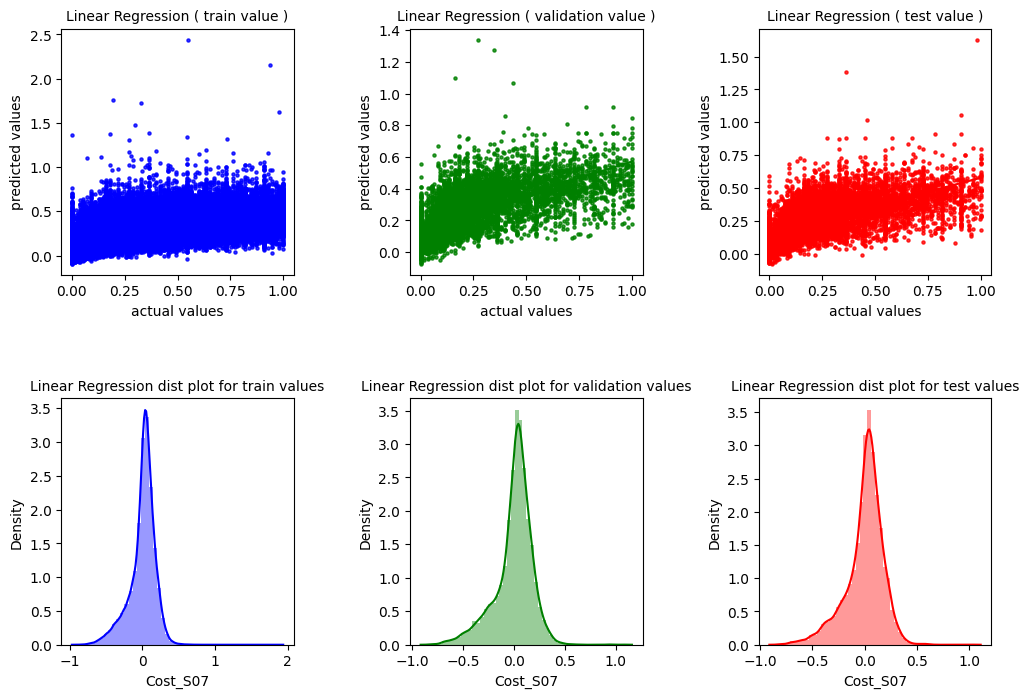

In [125]:
# create a figure with 2 rows and 3 columns of subplots
fig , ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt . subplots ( nrows=2 , ncols=3 , figsize=(12, 8) )

# plot the data on the subplots
ax1 . set_title('Linear Regression ( train value )' , size  = 10)
sns . regplot(x = y_train, y = y_pred_train1, ax = ax1, color = 'blue',scatter_kws={'s': 5},line_kws={'linewidth': 1.5})
ax1 . set_xlabel('actual values')
ax1 . set_ylabel('predicted values')

ax2 . set_title('Linear Regression ( validation value )'  , size  = 10)
sns . regplot(x = y_val, y = y_pred_val1, ax = ax2 , color = 'green' , scatter_kws={'s': 5},line_kws={'linewidth': 1.5})
ax2 . set_xlabel('actual values')
ax2 . set_ylabel('predicted values')

ax3 . set_title('Linear Regression ( test value )' , size  = 10)
sns . regplot(x = y_test, y = y_pred_test1 , ax = ax3 , color = 'red' , scatter_kws={'s': 5},line_kws={'linewidth': 1.5})
ax3 . set_xlabel('actual values')
ax3 . set_ylabel('predicted values')

sns . distplot(y_pred_train1-y_train , color = 'blue' , ax = ax4)
ax4 . set_title('Linear Regression dist plot for train values' , size  = 10)

sns . distplot(y_pred_val1-y_val , color = 'green' , ax = ax5)
ax5 . set_title('Linear Regression dist plot for validation values' , size  = 10)

sns . distplot(y_pred_test1-y_test , color = 'red' , ax = ax6)
ax6 . set_title('Linear Regression dist plot for test values' , size  = 10)

# Adjust the spacing between subplots
plt . subplots_adjust(wspace=0.5, hspace=0.5)

# Display the plot
plt . show()

In [142]:
es11 = r2_score(y_train , y_pred_train1)
es12 = r2_score(y_val , y_pred_val1)
es13 = r2_score(y_test , y_pred_test1)
mse11 = mean_squared_error(y_train , y_pred_train1)
mse12 = mean_squared_error(y_val , y_pred_val1)
mse13 = mean_squared_error(y_test , y_pred_test1)
data1 = {
    'r2-score': [es11, es12, es13],
    'MAE': [mse11, mse12, mse13]
}
# make dataframe
dfd1 = pd . DataFrame(data1, index=['train', 'validation', 'test'])

In [143]:
dfd1

,r2-score,MAE
train,0.426195,0.032051
validation,0.421414,0.033762
test,0.410463,0.032467


## DecisionTree Regression

we must first get the best value for max_depth . so we can plot the mse values from 1 to 50 to check what happen to r2_score . we can also do it to MSE error . we want higher r2_score and lower MSE . we can see the result in below plots.

In [155]:
list11 = []
list12 = []
for i in range(1,15):
    dt = DecisionTreeRegressor(max_depth = i , min_samples_leaf = 2 , random_state = 42)
    dt . fit(x_train, y_train)
    y_pred_val2 = dt . predict(x_val)
    msev1 = r2_score(y_val , y_pred_val2)
    list11 . append(msev1)
    msev2 = mean_squared_error(y_val , y_pred_val2)
    list12 . append(msev2)

Text(0, 0.5, 'MSE')

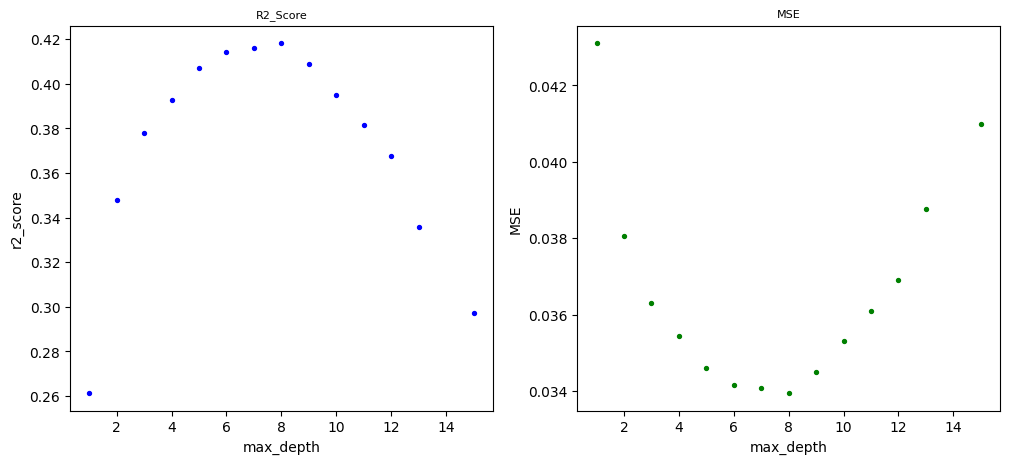

In [156]:
arr1 = np.linspace(1, 15, num=14, dtype=int)

# create a figure with 2 rows and 3 columns of subplots
fig , (ax1, ax2) = plt . subplots ( nrows=1 , ncols=2 , figsize=(12, 5) )

# plot the data on the subplots
ax1 . set_title('R2_Score' , size  = 8)
ax1 . scatter(arr1 , list11 , s = 8 , color = 'blue')
ax1 . set_xlabel('max_depth')
ax1 . set_ylabel('r2_score')

ax2 . set_title('MSE'  , size  = 8)
ax2 . scatter(arr1 , list12 , s = 8 , color = 'green')
ax2 . set_xlabel('max_depth')
ax2 . set_ylabel('MSE')

the best max_depth accord to above estimation is equal to 22 . in below code we use it and preict and plot results

In [157]:
# make the Regression feature
dt = DecisionTreeRegressor(max_depth = 8 , min_samples_leaf = 2 , random_state = 42)
# then fit the train dataset using .fit
dt . fit(x_train, y_train)

DecisionTreeRegressor(max_depth=8, min_samples_leaf=2, random_state=42)

In [158]:
# predict the value of x_train and see the result of train
y_pred_train2 = dt . predict(x_train)
# predict the value of x_val and see the result of validation
y_pred_val2 = dt . predict(x_val)
# in next parts , first aquire best hyperparameters from x_val and then give the x_test prediction
y_pred_test2 = dt . predict(x_test)

C:\Users\amir\AppData\Local\Temp\ipykernel_20912\2354910338.py:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns . distplot(y_pred_train2-np.array(y_train) , color = 'blue' , ax = ax4)
C:\Users\amir\AppData\Local\Temp\ipykernel_20912\2354910338.py:23: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns . distplot(y_pre

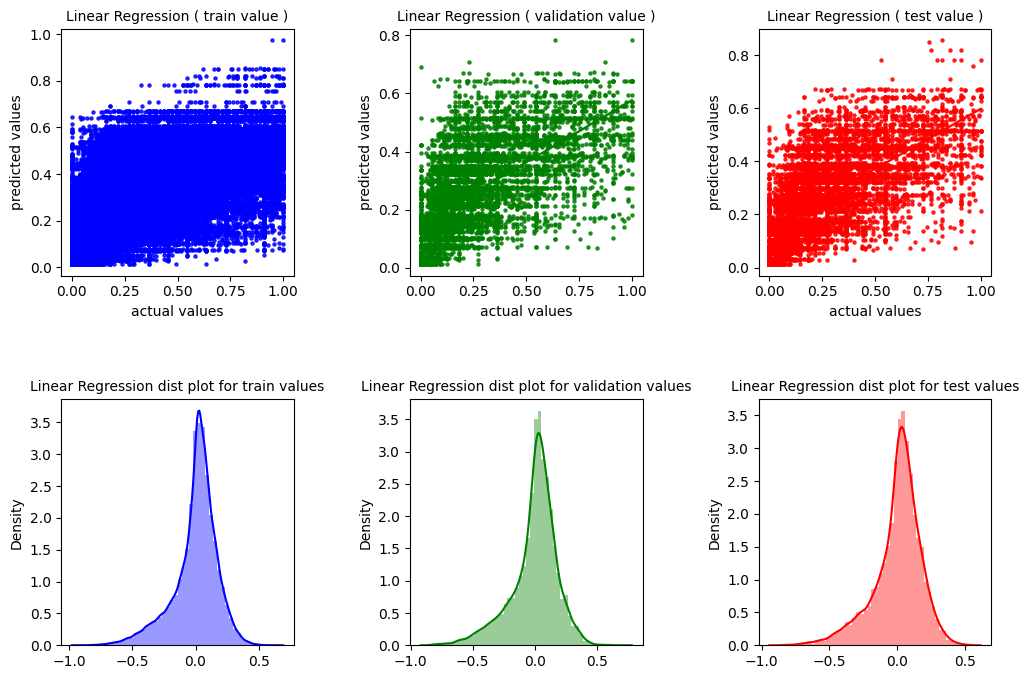

In [159]:
# create a figure with 2 rows and 3 columns of subplots
fig , ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt . subplots ( nrows=2 , ncols=3 , figsize=(12, 8) )

# plot the data on the subplots
ax1 . set_title('Linear Regression ( train value )' , size  = 10)
sns . regplot(x = y_train, y = y_pred_train2, ax = ax1, color = 'blue',scatter_kws={'s': 5},line_kws={'linewidth': 1.5})
ax1 . set_xlabel('actual values')
ax1 . set_ylabel('predicted values')

ax2 . set_title('Linear Regression ( validation value )'  , size  = 10)
sns . regplot(x = y_val, y = y_pred_val2, ax = ax2 , color = 'green' , scatter_kws={'s': 5},line_kws={'linewidth': 1.5})
ax2 . set_xlabel('actual values')
ax2 . set_ylabel('predicted values')

ax3 . set_title('Linear Regression ( test value )' , size  = 10)
sns . regplot(x = y_test, y = y_pred_test2 , ax = ax3 , color = 'red' , scatter_kws={'s': 5},line_kws={'linewidth': 1.5})
ax3 . set_xlabel('actual values')
ax3 . set_ylabel('predicted values')

sns . distplot(y_pred_train2-np.array(y_train) , color = 'blue' , ax = ax4)
ax4 . set_title('Linear Regression dist plot for train values' , size  = 10)

sns . distplot(y_pred_val2-np.array(y_val) , color = 'green' , ax = ax5)
ax5 . set_title('Linear Regression dist plot for validation values' , size  = 10)

sns . distplot(y_pred_test2-np.array(y_test) , color = 'red' , ax = ax6)
ax6 . set_title('Linear Regression dist plot for test values' , size  = 10)

# Adjust the spacing between subplots
plt . subplots_adjust(wspace=0.5, hspace=0.5)

# Display the plot
plt . show()

In [160]:
es21 = r2_score(y_train , y_pred_train2)
es22 = r2_score(y_val , y_pred_val2)
es23 = r2_score(y_test , y_pred_test2)
mse21 = mean_squared_error(y_train , y_pred_train2)
mse22 = mean_squared_error(y_val , y_pred_val2)
mse23 = mean_squared_error(y_test , y_pred_test2)
data2 = {
    'r2-score': [es21, es22, es23],
    'MSE': [mse21, mse22, mse23]
}
# make dataframe
dfd2 = pd . DataFrame(data2, index=['train', 'validation', 'test'])

In [162]:
dfd2

,r2-score,MSE
train,0.451294,0.030649
validation,0.418278,0.033945
test,0.441818,0.030740


## Random Forest Regressor

we must first get the best value for n_estimator . so we can plot the mse values from 1 to 50 to check what happen to r2_score . we can also do it to MSE error . we want higher r2_score and lower MSE . we can see the result in below plots.

Text(0, 0.5, 'MSE')

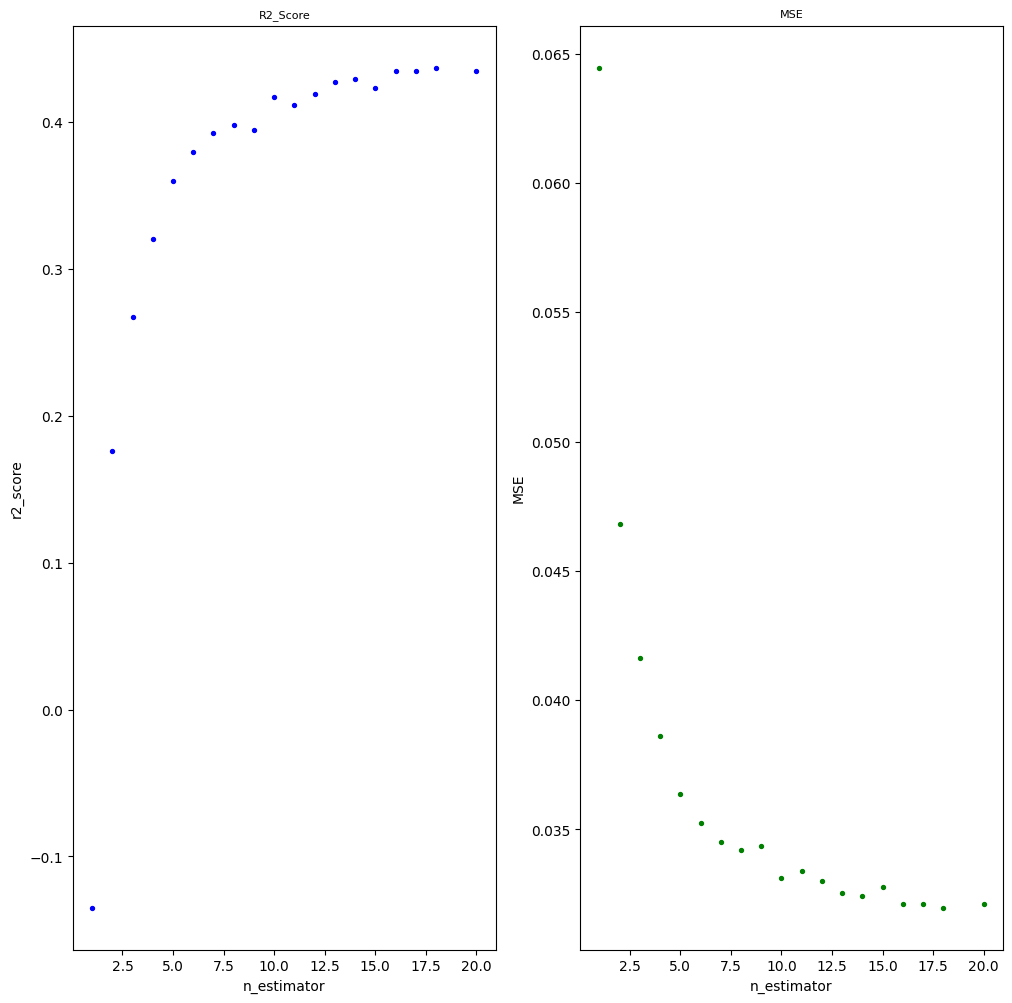

In [279]:
list21 = []
list22 = []
for i in range(1,20):
    reg = RandomForestRegressor(n_estimators=i)
    reg . fit(x_train, y_train)
    y_pred_val3 = reg . predict(x_val)
    msev1 = r2_score(y_val , y_pred_val3)
    list21 . append(msev1)
    msev2 = mean_squared_error(y_val , y_pred_val3)
    list22 . append(msev2)

arr2 = np.linspace(1, 20, num=19, dtype=int)

# create a figure with 2 rows and 3 columns of subplots
fig , ((ax1, ax2)) = plt . subplots ( nrows=1 , ncols=2 , figsize=(12, 12))

# plot the data on the subplots
ax1 . set_title('R2_Score' , size  = 8)
ax1 . scatter(arr2 , list21 , s = 8 , color = 'blue')
ax1 . set_xlabel('n_estimator')
ax1 . set_ylabel('r2_score')

ax2 . set_title('MSE'  , size  = 8)
ax2 . scatter(arr2 , list22 , s = 8 , color = 'green')
ax2 . set_xlabel('n_estimator')
ax2 . set_ylabel('MSE')

In [163]:
cvregm = RandomForestRegressor(n_estimators = 25, random_state=42, oob_score=True)
kf = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(cvregm , x_train, y_train , cv = kf, scoring='r2')
# Print the mean and standard deviation of the cross-validation scores
print(f"Mean R-squared: {np.mean(scores):.3f}")
print(f"Standard deviation: {np.std(scores):.3f}")
cvregm . fit(x_train , y_train)

c:\Users\amir\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
c:\Users\amir\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
c:\Users\amir\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
c:\Users\amir\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
c:\Users\amir\AppDat

Mean R-squared: 0.456
Standard deviation: 0.004


c:\Users\amir\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


RandomForestRegressor(n_estimators=25, oob_score=True, random_state=42)

In [164]:
# predict the value of x_train and see the result of train
y_pred_train3 = cvregm . predict(x_train)
# predict the value of x_val and see the result of validation
y_pred_val3 = cvregm . predict(x_val)
# in next parts , first aquire best hyperparameters from x_val and then give the x_test prediction
y_pred_test3 = cvregm . predict(x_test)

C:\Users\amir\AppData\Local\Temp\ipykernel_20912\3636578617.py:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns . distplot(y_pred_train3-np.array(y_train) , color = 'blue' , ax = ax4)
C:\Users\amir\AppData\Local\Temp\ipykernel_20912\3636578617.py:23: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns . distplot(y_pre

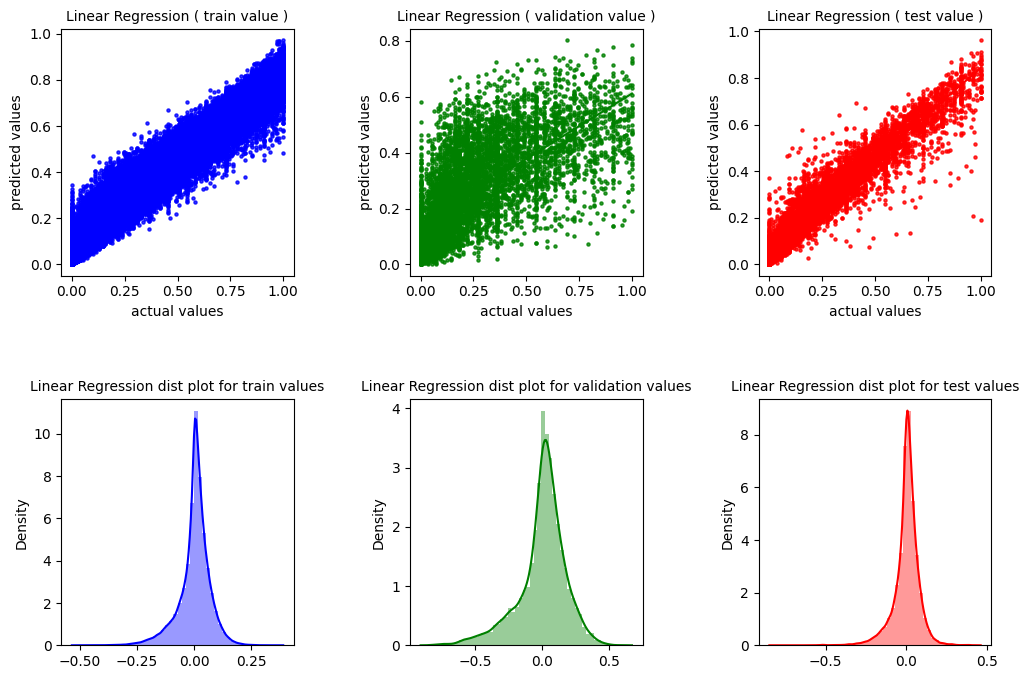

In [165]:
# create a figure with 2 rows and 3 columns of subplots
fig , ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt . subplots ( nrows=2 , ncols=3 , figsize=(12, 8) )

# plot the data on the subplots
ax1 . set_title('Linear Regression ( train value )' , size  = 10)
sns . regplot(x = y_train, y = y_pred_train3, ax = ax1, color = 'blue',scatter_kws={'s': 5},line_kws={'linewidth': 1.5})
ax1 . set_xlabel('actual values')
ax1 . set_ylabel('predicted values')

ax2 . set_title('Linear Regression ( validation value )'  , size  = 10)
sns . regplot(x = y_val, y = y_pred_val3, ax = ax2 , color = 'green' , scatter_kws={'s': 5},line_kws={'linewidth': 1.5})
ax2 . set_xlabel('actual values')
ax2 . set_ylabel('predicted values')

ax3 . set_title('Linear Regression ( test value )' , size  = 10)
sns . regplot(x = y_test, y = y_pred_test3 , ax = ax3 , color = 'red' , scatter_kws={'s': 5},line_kws={'linewidth': 1.5})
ax3 . set_xlabel('actual values')
ax3 . set_ylabel('predicted values')

sns . distplot(y_pred_train3-np.array(y_train) , color = 'blue' , ax = ax4)
ax4 . set_title('Linear Regression dist plot for train values' , size  = 10)

sns . distplot(y_pred_val3-np.array(y_val) , color = 'green' , ax = ax5)
ax5 . set_title('Linear Regression dist plot for validation values' , size  = 10)

sns . distplot(y_pred_test3-np.array(y_test) , color = 'red' , ax = ax6)
ax6 . set_title('Linear Regression dist plot for test values' , size  = 10)

# Adjust the spacing between subplots
plt . subplots_adjust(wspace=0.5, hspace=0.5)

# Display the plot
plt . show()

In [166]:
es31 = r2_score(y_train , y_pred_train3)
es32 = r2_score(y_val , y_pred_val3)
es33 = r2_score(y_test , y_pred_test3)
mse31 = mean_squared_error(y_train , y_pred_train3)
mse32 = mean_squared_error(y_val , y_pred_val3)
mse33 = mean_squared_error(y_test , y_pred_test3)
data3 = {
    'r2-score': [es31, es32, es33],
    'MSE': [mse31, mse32, mse33]
}
# make dataframe
dfd3 = pd . DataFrame(data3, index=['train', 'validation', 'test'])

In [167]:
dfd3

,r2-score,MSE
train,0.916586,0.004659
validation,0.457903,0.031633
test,0.888747,0.006127


## ensmble learning

In [186]:
from sklearn.ensemble import VotingRegressor
vr = VotingRegressor(estimators=[
    ('random_forest',cvlrm),
    ('linear_regression', dt),
] , weights = [40 , 60])

vr . fit(x_train, y_train)
# predict the value of x_train and see the result of train
y_pred_train4 = vr . predict(x_train)
# predict the value of x_val and see the result of validation
y_pred_val4 = vr . predict(x_val)
# in next parts , first aquire best hyperparameters from x_val and then give the x_test prediction
y_pred_test4 = vr . predict(x_test)

C:\Users\amir\AppData\Local\Temp\ipykernel_20912\43655434.py:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns . distplot(y_pred_train4-np.array(y_train) , color = 'blue' , ax = ax4)
C:\Users\amir\AppData\Local\Temp\ipykernel_20912\43655434.py:23: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns . distplot(y_pred_va

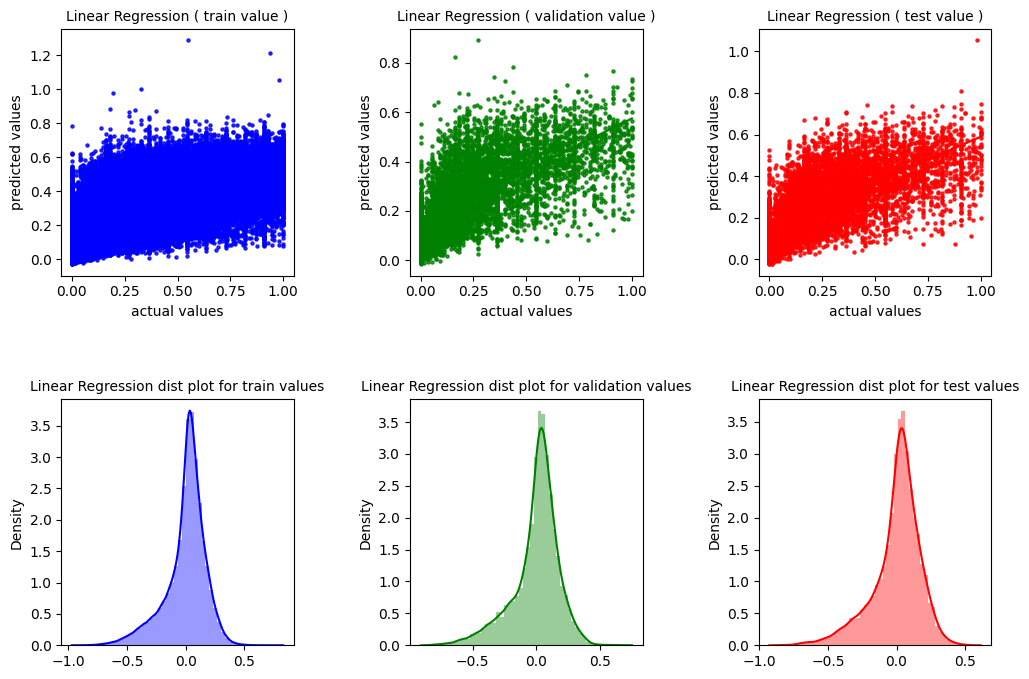

In [187]:
# create a figure with 2 rows and 3 columns of subplots
fig , ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt . subplots ( nrows=2 , ncols=3 , figsize=(12, 8) )

# plot the data on the subplots
ax1 . set_title('Linear Regression ( train value )' , size  = 10)
sns . regplot(x = y_train, y = y_pred_train4, ax = ax1, color = 'blue',scatter_kws={'s': 5},line_kws={'linewidth': 1.5})
ax1 . set_xlabel('actual values')
ax1 . set_ylabel('predicted values')

ax2 . set_title('Linear Regression ( validation value )'  , size  = 10)
sns . regplot(x = y_val, y = y_pred_val4, ax = ax2 , color = 'green' , scatter_kws={'s': 5},line_kws={'linewidth': 1.5})
ax2 . set_xlabel('actual values')
ax2 . set_ylabel('predicted values')

ax3 . set_title('Linear Regression ( test value )' , size  = 10)
sns . regplot(x = y_test, y = y_pred_test4 , ax = ax3 , color = 'red' , scatter_kws={'s': 5},line_kws={'linewidth': 1.5})
ax3 . set_xlabel('actual values')
ax3 . set_ylabel('predicted values')

sns . distplot(y_pred_train4-np.array(y_train) , color = 'blue' , ax = ax4)
ax4 . set_title('Linear Regression dist plot for train values' , size  = 10)

sns . distplot(y_pred_val4-np.array(y_val) , color = 'green' , ax = ax5)
ax5 . set_title('Linear Regression dist plot for validation values' , size  = 10)

sns . distplot(y_pred_test4-np.array(y_test) , color = 'red' , ax = ax6)
ax6 . set_title('Linear Regression dist plot for test values' , size  = 10)

# Adjust the spacing between subplots
plt . subplots_adjust(wspace=0.5, hspace=0.5)

# Display the plot
plt . show()

In [188]:
es41 = r2_score(y_train , y_pred_train4)
es42 = r2_score(y_val , y_pred_val4)
es43 = r2_score(y_test , y_pred_test4)
mse41 = mean_squared_error(y_train , y_pred_train4)
mse42 = mean_squared_error(y_val , y_pred_val4)
mse43 = mean_squared_error(y_test , y_pred_test4)
data4 = {
    'r2-score': [es41, es42, es43],
    'MAE': [mse41, mse42, mse43]
}
# make dataframe
dfd4 = pd . DataFrame(data4, index=['train', 'validation', 'test'])

In [189]:
dfd4

,r2-score,MAE
train,0.459309,0.030201
validation,0.436911,0.032858
test,0.449027,0.030343
